# Logistic Regression with Python

Data used in this regression analysis is the Titanic Data Set from Kaggle (https://www.kaggle.com/c/titanic).

I will be trying to predict a classification- survival or deceased.

We'll use a "semi-cleaned" version of the titanic data set.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## The Data

Reading in the titanic_train.csv file into a pandas dataframe.

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis



## Missing Data

Using seaborn to create a simple heatmap to see the missing data.

<AxesSubplot:>

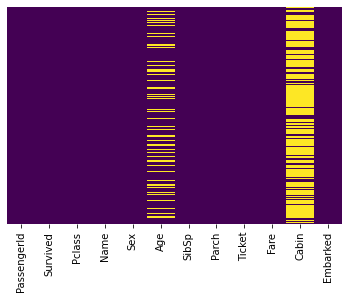

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Missing Age data
num_missing_age = train['Age'].isnull().sum()
perc_missing_age = int(num_missing_age*100/len(train))

# Missing Cabin data
num_missing_cabin = train['Cabin'].isnull().sum()
perc_missing_cabin = int(num_missing_cabin*100/len(train))

In [9]:
# Percent of missing age data
print(f"% age data missing: {perc_missing_age}%")
print(f"% cabin data missing: {perc_missing_cabin}%")

% age data missing: 19%
% cabin data missing: 77%


Roughly 20% of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 

Looking at the Cabin column, nearly 80% is missing. Its too much missing to do something useful with at a basic level. This column could be dropped or converted to something like "Cabin known: 1 or 0".

## Visualizing the data
Comparing number of deceased vs survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

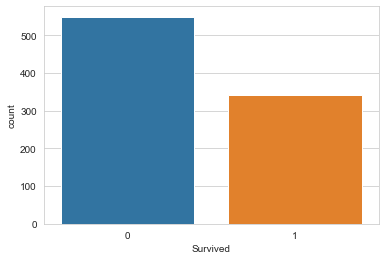

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

### Deceased vs survived by gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

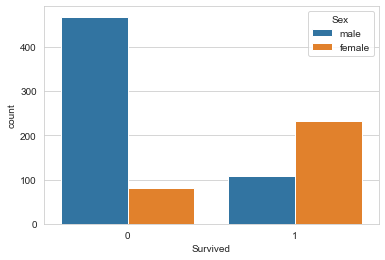

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

People who survived were more likely to be female.

### Deceased vs survived by passenger class

<AxesSubplot:xlabel='Survived', ylabel='count'>

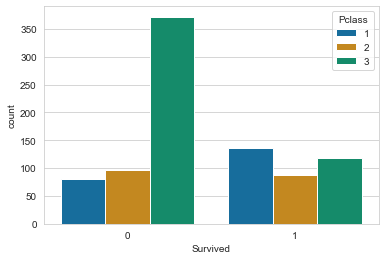

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='colorblind')

Passengers who did not survive were more likely to be from the third (cheapest) class. And passengers who did survive were leaning more towards upper classes, especially first class.

### Looking at the age distribtion of passengers.

<AxesSubplot:xlabel='Age'>

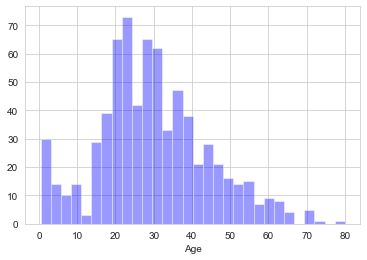

In [24]:
sns.distplot(train['Age'].dropna(),kde=False,color='blue',bins=30)

There seems to be a bimodal distribution of passenger age, and overall age is skewed towards the younger side (20-30 years old) on average.

<AxesSubplot:>

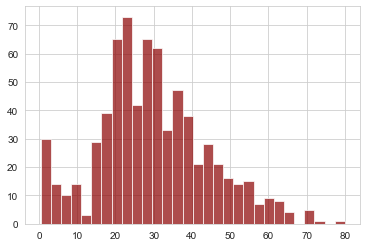

In [26]:
# Visualizing the age with Panda's own visualization.

train['Age'].hist(bins=30,color='darkred',alpha=0.7)

### Number of siblings or spouses onboard.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

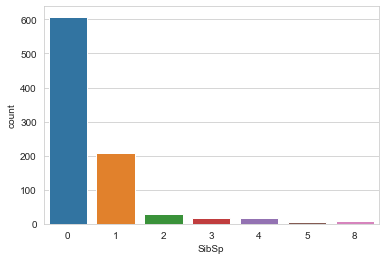

In [27]:
sns.countplot(x='SibSp',data=train)

Most passengers did not have siblings or spouse onboard, or more likely to just have a spouse onboard.

### How much people paid for their ticket.

<AxesSubplot:>

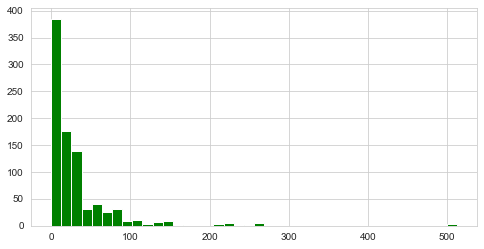

In [31]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

There's a wide distribtion of fares paid, with the majority of fares being under $100. Which makes sense since most passengers were in the third class.

____
### Cufflinks for plots
Using cufflinks for a more interactive plot.

In [32]:
import cufflinks as cf
cf.go_offline()

In [33]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
Filling in the missing age data with the mean age of all the passengers.
However a better way to go about this is to check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

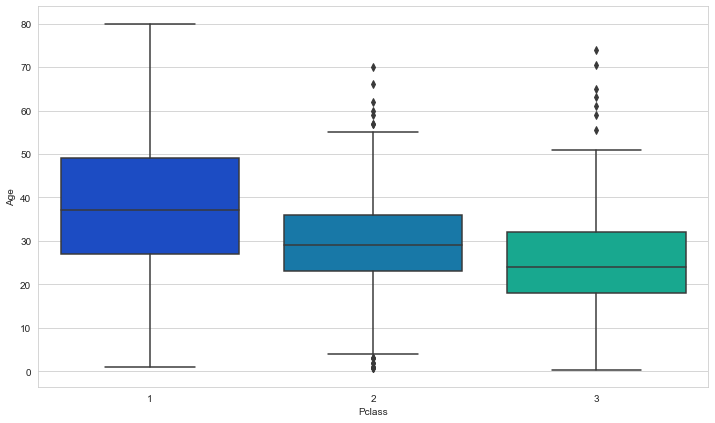

In [35]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The wealthier passengers in the higher classes tend to be older. We can use these average age values to impute the missing age data by class.

### Average age by class.

In [43]:
first_class_age = int(train.loc[train['Pclass'] == 1, 'Age'].mean())
second_class_age = int(train.loc[train['Pclass'] == 2, 'Age'].mean())
third_class_age = int(train.loc[train['Pclass'] == 3, 'Age'].mean())

In [44]:
print(f"""
First class average age: {first_class_age}
Second class average age: {second_class_age}
Third class average age: {third_class_age}
""")


First class average age: 38
Second class average age: 29
Third class average age: 24



### Impute average age by class function.

In [45]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return first_class_age

        elif Pclass == 2:
            return second_class_age

        else:
            return third_class_age

    else:
        return Age

In [46]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

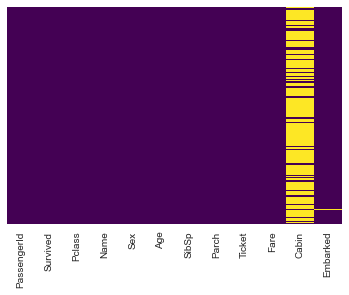

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column and the row in Embarked that is NaN.

In [48]:
train.drop('Cabin',axis=1,inplace=True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [50]:
train.dropna(inplace=True)

## Converting Categorical Features 

Convert categorical features to dummy variables using pandas. Otherwise machine learning algorithm won't be able to directly take in those features as inputs.

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Pandas .get_dummies method converts categorical values to dummy/indicator variables

In [54]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
# drop first column since the other column will be predictor of first column (e.g. if passenger is female "1", then they are not male "0")

embark = pd.get_dummies(train['Embarked'],drop_first=True)

Drop columns that we encoded in previous step, as well as columns that wont be needed (Name and Ticket).

In [55]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [56]:
train = pd.concat([train,sex,embark],axis=1)

In [58]:
train.drop('PassengerId', axis=1, inplace=True)

In [59]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Data is now ready for model.

# Building a Logistic Regression model

Starting by splitting data into a training set and test set.

## Train Test Split

Separate data to X and y, where y is the value/column we want to predict (Survived or not) and X (everything else) are the features

In [61]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    train.drop('Survived',axis=1), 
                                                    train['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=101
                                                    )

Scaling the data

### Training and Predicting by creating a model

In [64]:
from sklearn.linear_model import LogisticRegression

Create instance of logistic regression model

In [68]:
logmodel = LogisticRegression(max_iter=10000)

Create the model

In [69]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

Predict using the model

In [70]:
predictions = logmodel.predict(X_test)

In [76]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

## Evaluation

We can check precision, recall, f1-score using classification report.

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]])

True Positives (TP) - Survived: 72

True Negatives (TN) - Deceased: 150
___

False Positives (FP) - Deceased but predicted survived: 13

False Negatives (FN) - Survived but predicted deceased: 32

# Summary

Accuracy score is 83% which means how often the model was correct at determining if a given passenger survived or not.

Precision: From all the surviving passengers that the model predicted, only 85% actually did survive.

Recall: Out of all the passengers that did survive, the model only predicted this outcome correctly for 69% of the given passengers.

F1 Score: This value is 0.76 which is somewhat close to 1, meaning the model does an ok job at predicting whether or not a given passenger survives.

Possible feature engineering ideas:

* Extracting the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* The Cabin letter could be a feature.
* Cabin location on the ship from the ticket number.